In [1]:
!pip install qutip

In [2]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Jaynes Cumming Hamiltonian

In [3]:
#Set parameter values
gamma = 0.1
Omega = 2*np.pi*0.1
wc = 2*np.pi
delta = 0.1
wa = wc + delta
N = 16

In [4]:
#Operators of the system
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
H_field = wc*a*a.dag()
H_atom = wa*sm.dag()*sm
H_int = Omega*(a + a.dag())*(sm + sm.dag())
H = H_field + H_atom + H_int 

In [5]:
#Running it
psi0 = tensor(fock(N,1), fock(2,0))
t = np.linspace(0,100,1000)
c_op_list = [np.sqrt(gamma) * (sm+sm.dag())/np.sqrt(2)] #Collapse operator
output = mesolve(H, psi0, t, c_op_list, [a.dag()*a, sm.dag()*sm])

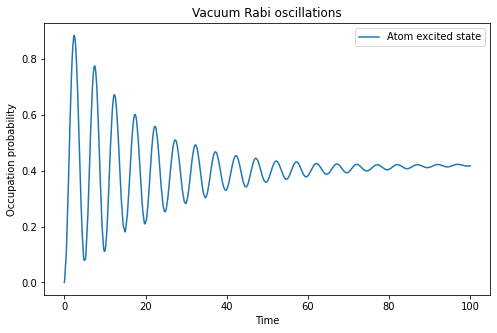

In [6]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t, output.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations');

# Maxwell Bloch equations

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [8]:
def density_der(p):
    gamma = 0.1
    Omega = 2*np.pi*0.1
    delta = 0
    pdot = np.array([0+0*1j,0+0*1j,0+0*1j,0+0*1j])
    pdot[0] = (-gamma*p[0]) + 0.5j*(Omega*(p[2] - p[1]))
    pdot[1] = -(-1j*delta + gamma/2)*p[1] - 0.5j*(Omega*(p[0] - p[3]))
    pdot[2] = -(1j*delta + gamma/2)*p[2] + 0.5j*(Omega*(p[0] - p[3]))
    pdot[3] = (-gamma*p[0]) - 0.5j*(Omega*(p[2] - p[1]))
    return pdot

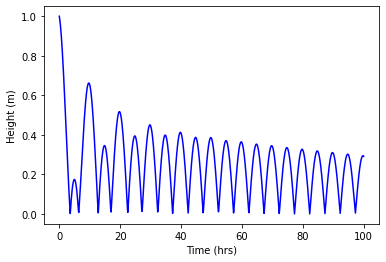

In [12]:
t = np.linspace(0,100,1000)
step_size = t[1]-t[0]
p0 = np.array([1+0*1j,0+0*1j,0+0*1j,0+0*1j])
solution = [abs(p0[0])]
for j in range(1,len(t)):
    add = density_der(p0)
    for i in range(4):
        p0[i] += add[i]*step_size 
    solution.append(abs(p0[0]))
plt.plot(t,np.absolute(solution),'b-')
plt.xlabel('Time (hrs)')
plt.ylabel('Height (m)')
plt.show()